<a href="https://colab.research.google.com/github/AyraCaps/Dsa-arya/blob/main/AryaP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Assignment on Classification***

---



---



In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
# loading the dataset
data=pd.read_excel('/content/iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# get some basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#statistical summary
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.median()

<ipython-input-5-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


SL    5.80
SW    3.00
PL    4.35
PW    1.30
dtype: float64

In [6]:
# data types
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

**Missing Value**

In [7]:
# checking missing values
data.isna().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

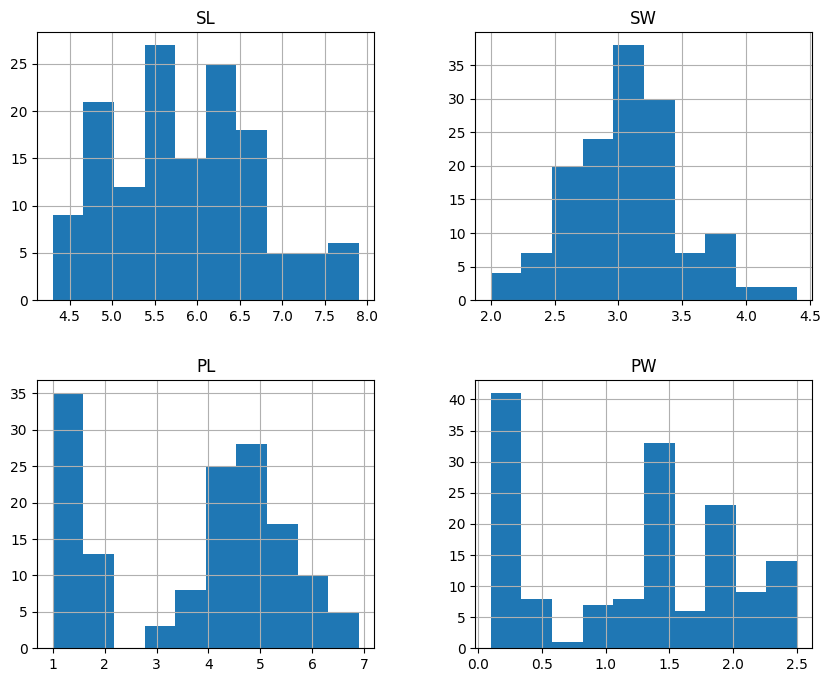

In [8]:
data.hist(figsize=(10,8))

In [9]:
data['SL'].skew()

0.3068227108046868

In [10]:
data.skew()

<ipython-input-10-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


SL    0.306823
SW    0.377818
PL   -0.268905
PW   -0.104997
dtype: float64

In [11]:
data.shape

(150, 5)

In [12]:
# filling missing values  by median

data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Outlier

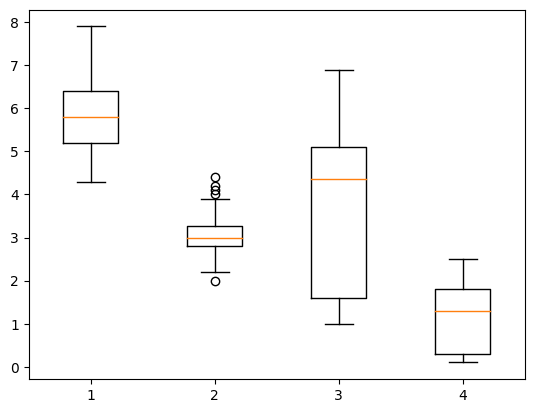

In [14]:
plt.figure()
plt.boxplot(data.select_dtypes(include=['float64']) ) ;# BOXPLOT


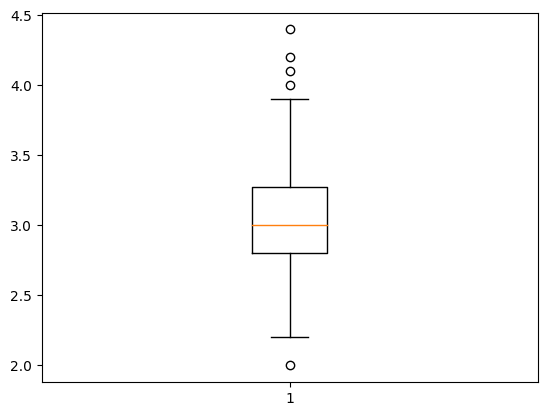

In [15]:
plt.boxplot(data['SW']);

In [16]:
# handling outliers in 'SW' column
Q1 = np.percentile(data['SW'],25,method='midpoint')
Q2 = np.percentile(data['SW'],50,method='midpoint')
Q3 = np.percentile(data['SW'],75,method='midpoint')
IQR =Q3 - Q1

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)
print('IQR =',IQR)

  #Finding the lower limit and upper limit
low_lim = Q1 - 1.5*IQR
up_lim = Q3 +1.5*IQR
print('lower limit = ',low_lim )
print('upper limit  ',up_lim )


Q1 is:  2.8
Q2 is:  3.0
Q3 is:  3.25
IQR = 0.4500000000000002
lower limit =  2.1249999999999996
upper limit   3.9250000000000003


In [17]:
out=(data['SW']> up_lim) | (data['SW']< low_lim)
data.loc[out].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [18]:
data.drop([14, 15, 32, 33, 60],inplace=True)

In [19]:
data.shape

(145, 5)

Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

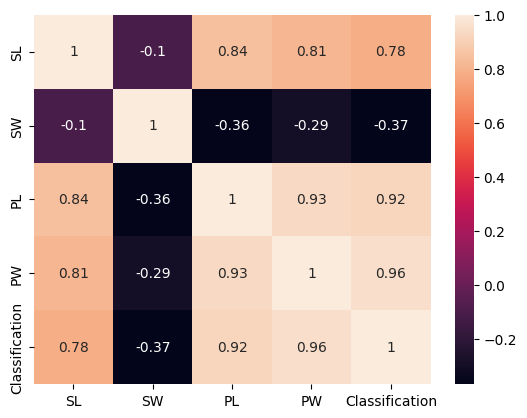

In [24]:
sns.heatmap(data.corr(),annot=True)

In [25]:
x = data.drop('Classification', axis=1)
y = data['Classification']

In [26]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)


**Logistic regression**

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state =4,max_iter=300)

In [28]:
log_model=log_reg.fit(x_train,y_train)


In [29]:
log_pred=log_reg.predict(x_test)
log_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [31]:
confusion_matrix(y_test,log_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [32]:
print('Acurracy: ',accuracy_score(y_test,log_pred))
print('Precision: ',precision_score(y_test,log_pred,average='micro'))
print('recall: ',recall_score(y_test,log_pred,average='micro'))
print('F1: ',f1_score(y_test,log_pred,average='micro'))

Acurracy:  0.9310344827586207
Precision:  0.9310344827586207
recall:  0.9310344827586207
F1:  0.9310344827586207


plot - Logistic regression

In [68]:
X=x[['PL','PW']]
y = data['Classification']
h = .02
from matplotlib.colors import ListedColormap

In [34]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [69]:
x_min, x_max = X['PL'].min() - 1, X['PL'].max() + 1
y_min, y_max = X['PW'].min() - 1, X['PW'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal width')

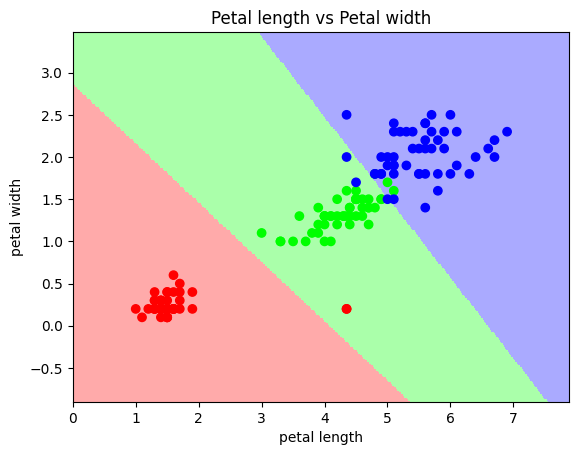

In [70]:
log_reg.fit(X,y)
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['PL'], X['PW'], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Petal length vs Petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')



**k-NN**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
metric_k=[]
neighbors=np.arange(5,15)

In [94]:
 for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,algorithm ='brute',metric='minkowski',leaf_size=40,p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'metric k')

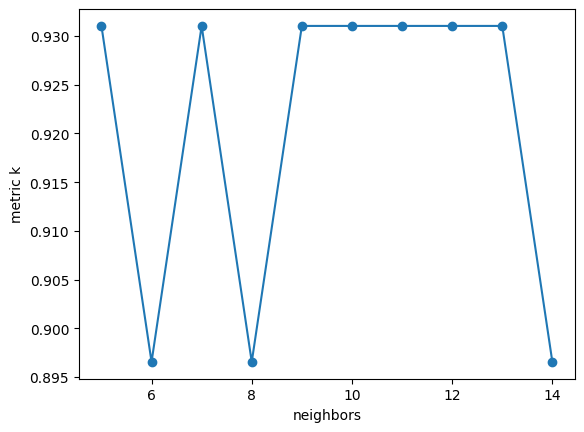

In [95]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('metric k')

In [99]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm ='brute',metric='minkowski',leaf_size=35,p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)
accuracy=accuracy_score(y_test,knn_pred)
metric_k.append(accuracy)

In [100]:
confusion_matrix(y_test,knn_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [98]:
print('Acurracy: ',accuracy_score(y_test,knn_pred))
print('Precision: ',precision_score(y_test,knn_pred,average='micro'))
print('recall: ',recall_score(y_test,knn_pred,average='micro'))
print('F1: ',f1_score(y_test,knn_pred,average='micro'))

Acurracy:  0.9310344827586207
Precision:  0.9310344827586207
recall:  0.9310344827586207
F1:  0.9310344827586207


In [80]:
print('Acurracy: ',accuracy_score(y_test,knn_pred))


Acurracy:  0.9310344827586207


plot - kNN Model

In [45]:
X=x[['PL','PW']]
y = data['Classification']
h = .02
from matplotlib.colors import ListedColormap

In [46]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [47]:
x_min, x_max = X['PL'].min() - 1, X['PL'].max() + 1
y_min, y_max = X['PW'].min() - 1, X['PW'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal width')

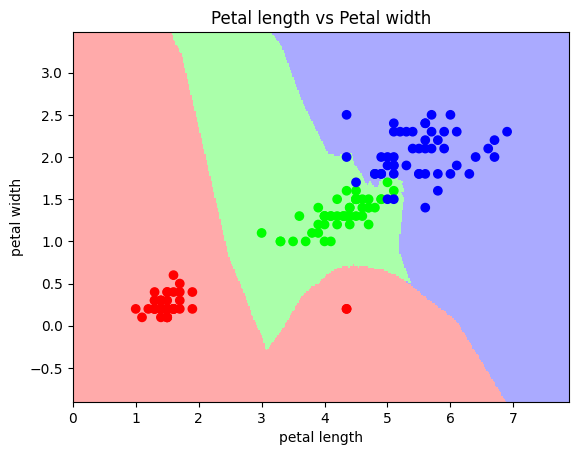

In [48]:
classifier.fit(X,y)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['PL'], X['PW'], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Petal length vs Petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')


**SVM model**

In [178]:
from sklearn.svm import SVC
svc_clf=SVC(kernel='rbf',gamma='auto')
svc_clf.fit(x_train,y_train)

SVC(gamma='auto')

In [179]:
y_pred=svc_clf.predict(x_test)

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [181]:

print(confusion_matrix(y_test,y_pred))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [182]:
print('Acurracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred,average='micro'))
print('recall: ',recall_score(y_test,y_pred,average='micro'))
print('F1: ',f1_score(y_test,y_pred,average='micro'))

Acurracy:  0.9310344827586207
Precision:  0.9310344827586207
recall:  0.9310344827586207
F1:  0.9310344827586207


plot- SVM Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal width')

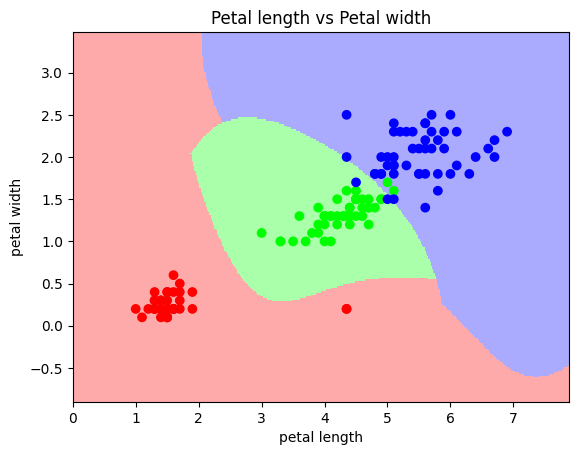

In [183]:
svc_clf.fit(X,y)
Zt = svc_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Zt = Zt.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Zt, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['PL'], X['PW'], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Petal length vs Petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')

**Decision Tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [57]:
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))

confusion matrix
[[9 0 0]
 [0 8 1]
 [0 2 9]]


In [58]:
print('Acurracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred,average='micro'))
print('recall: ',recall_score(y_test,y_pred,average='micro'))
print('F1: ',f1_score(y_test,y_pred,average='micro'))

Acurracy:  0.896551724137931
Precision:  0.896551724137931
recall:  0.896551724137931
F1:  0.896551724137931


plot- Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal width')

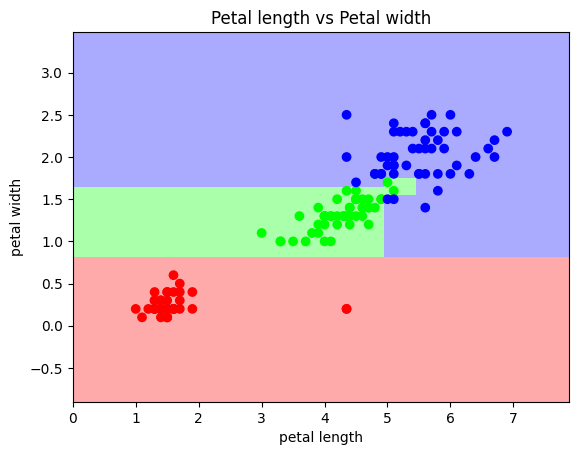

In [72]:
dt_clf.fit(X,y)
Zt = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Zt = Zt.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Zt, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['PL'], X['PW'], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Petal length vs Petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')

**Random forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [61]:
print(confusion_matrix(y_test,y_pred))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [62]:
print('Acurracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred,average='micro'))
print('recall: ',recall_score(y_test,y_pred,average='micro'))
print('F1: ',f1_score(y_test,y_pred,average='micro'))

Acurracy:  0.9310344827586207
Precision:  0.9310344827586207
recall:  0.9310344827586207
F1:  0.9310344827586207


In [63]:
# hyper parameter tunniing

In [64]:
rf_clf1= RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy',min_samples_split=3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [65]:
y_pred=rf_clf1.predict(x_test)

In [66]:
print('Acurracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred,average='micro'))
print('recall: ',recall_score(y_test,y_pred,average='micro'))
print('F1: ',f1_score(y_test,y_pred,average='micro'))

Acurracy:  0.896551724137931
Precision:  0.896551724137931
recall:  0.896551724137931
F1:  0.896551724137931


Plot- Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal width')

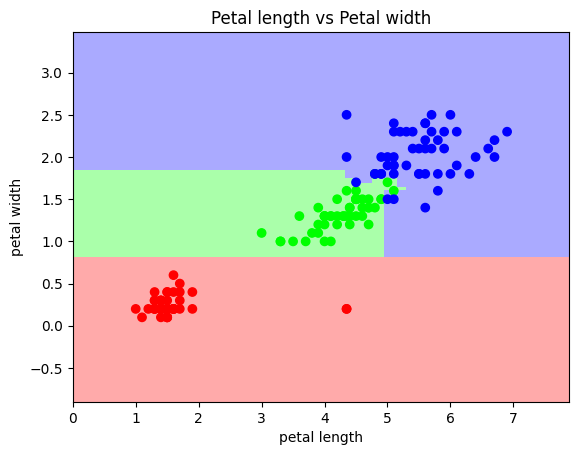

In [73]:
rf_clf1.fit(X,y)
Zt = rf_clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Zt = Zt.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Zt, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['PL'], X['PW'], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Petal length vs Petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')

from the above plots and  accuracy and confusion matrix  it is clear that random forest and decision tree are not that much better model . they are over fitting. SVM model is better model here. it's plot is smooth comparetive to others. other models are either over fitting or under fitting compared to svm